In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten 

#from keras.models import Sequential
#from keras.layers import Dense, Flatten 

from sklearn import datasets

#from tensorflow import keras
#import keras

np.set_printoptions(suppress=True)
keras.__version__

# 1.Logistic Regression

#### X는 4x2행렬 형태, 차원이 2개 존재함을 의미 
#### 인풋 레이어부터 시작해서 히든레이어, 히든레이어…., 출력 레이어해서 순서대로 쌓아간다고 해서 sequential 레이어라 한다.

#### 일반적으로 사용하는 레이어가 dense 레이어
#### 인풋은 2개지만 출력은 하나이고 시그모이드 함수를 사용
#### 손실함수를 지정하고 adam으로 경사하강법을, 정확도로 성능측정을 하겠다.

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
#y = np.array([[0],[0],[0],[1]])
y = np.array([[0],[1],[1],[1]])

model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=10)

#### 3000번 학습, verbose0을 주면 학습 과정이 보이지 않음

In [ ]:
hist = model.fit(X, y, epochs=3000, verbose=0)

In [ ]:
print(model.predict(X))

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
plt.plot(hist.history['accuracy'])

# 2.SoftMax Classification

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y_e = np.eye(3)[y]

#### 인풋이 4개가 각각 들어가는 출력이 3개 형태인 하나의 신경망이 된다 
#### 멀티클래스의 경우 categorical_cross…라는 손실함수 사용해야함

In [10]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X, y_e, epochs=4)

Epoch 1/4
150/150 [==============================] - 0s 2ms/step - loss: 3.0007 - accuracy: 0.3333
Epoch 2/4
150/150 [==============================] - 0s 51us/step - loss: 2.8989 - accuracy: 0.3333
Epoch 3/4
150/150 [==============================] - 0s 56us/step - loss: 2.8043 - accuracy: 0.3333
Epoch 4/4
150/150 [==============================] - 0s 58us/step - loss: 2.7089 - accuracy: 0.3333


In [12]:
hist = model.fit(X, y_e, epochs=2000, verbose=0)

#### 두 셀 모두 인식률을 계산하는 방법이지만 보통 evaluate를 사용

In [13]:
y_pred = model.predict_classes(X)
print(np.mean(y_pred==y))

0.9666666666666667


In [14]:
accuracy = model.evaluate(X, y_e)
print(accuracy)

150/150 [==============================] - 0s 195us/step
[0.11807605306307475, 0.9666666388511658]


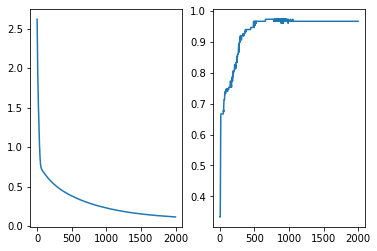

In [15]:
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])

# 3.XOR Classification

#### 이와같이 퍼셉트론으로는 xor문제를 풀 수 없음을 알 수 있다 인식률이 50%

In [16]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=7000, verbose=0)
print(model.predict(X))

[[0.50000006]
 [0.50000006]
 [0.5       ]
 [0.5       ]]


#### 입력데이터는 2개, 히든층의 유닛은 5개(렐루), 출력층의 유닛은 1개(시그모이드), 출력층은 꼭 시그모이드로 해야한다

In [17]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=2000, verbose=0)
print(model.predict(X))

[[0.16600843]
 [0.9810446 ]
 [0.87415487]
 [0.13347138]]


In [18]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=800, verbose=0)
print(model.predict(X))

[[0.04115046]
 [0.6593648 ]
 [0.6600459 ]
 [0.6632154 ]]


In [19]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=800, verbose=0)
print(model.predict(X))

[[0.01905996]
 [0.9985258 ]
 [0.99885917]
 [0.01906523]]


In [34]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=300, verbose=0)
print(model.predict(X))

d:\Anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


[[0.00682255]
 [0.9779317 ]
 [0.9468709 ]
 [0.02422553]]


# 4.Fashion Image Recognition¶

#### 학습 데이터를 255로 나누어 정규화

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_e = np.eye(10)[y_train]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Ankle boot')

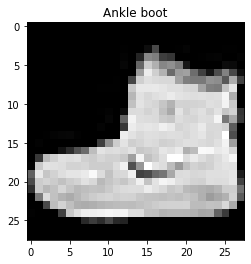

In [24]:
plt.imshow(x_train[0], cmap='gray')
plt.title(class_names[y_train[0]])

#### 2차원 데이터를 1차원으로 reshape, 28 x 28은 784이고 -1을 주면 전체데이터(60000개)를 의미

#### 히든층의 유닛은 128개, 출력층의 유닛은 10개(클래스가 10개라서)

In [27]:
x_train_1d = x_train.reshape(-1, 784)

model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(x_train_1d, y_train_e, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.5021 - accuracy: 0.8238
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3769 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.3386 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3135 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2942 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2795 - accuracy: 0.8976
Epoch 7/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.2660 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2551 - accuracy: 0.9054
Epoch 9/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2448 - accuracy: 0.9087
Epoch 10/10
60000/60000 [============================

#### 위에서는 2차원을 1차원으로 임의로 변경해 넣었는데 그렇게 하지말고 flattern을 이용해 내부적으로 2차원을 1차원으로 바꾸자

In [30]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_e, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.5012 - accuracy: 0.8232
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3752 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.3353 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3149 - accuracy: 0.8840
Epoch 5/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.2947 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2802 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.2683 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2558 - accuracy: 0.9053
Epoch 9/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.2482 - accuracy: 0.9075
Epoch 10/10
60000/60000 [==============================

#### 앞에서는 one hot encoding으로 변경해주는 작업을 했었는데 로스함수에 sparse_를 앞에 붙여서 일반 레이블 표기법으로 학습 가능

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs =10)

Epoch 1/2
60000/60000 [==============================] - 6s 100us/step - loss: 0.5046 - accuracy: 0.8225
Epoch 2/2
60000/60000 [==============================] - 6s 96us/step - loss: 0.3814 - accuracy: 0.8628
